# Source code for ICLR Reproducibility Challenge

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
 
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/SNIP-gahaalt/')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
import torch

DEVICE = 'cuda'
# DEVICE = 'cpu'

from datasets import RamLoader
from pruning import Pruner
from models import LeNet5
from models import vgg16
from network import NN

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-labels-idx1-ubyte.gz to Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Data/MNIST/raw



/content/drive/MyDrive/Colab Notebooks/SNIP-gahaalt/datasets.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmnist_x = TransformStandarize()(torch.tensor(mnist_full_x, device=DEVICE, dtype=torch.float))
/content/drive/MyDrive/Colab Notebooks/SNIP-gahaalt/datasets.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmnist_y = torch.tensor(mnist_full_y, device=DEVICE, dtype=torch.long)


# Network training

number of weights to prune: [150, 6, 2400, 16, 48000, 120, 10080, 84, 840, 10]
weights left:  [108, 4, 810, 9, 2031, 10, 1061, 21, 258, 8]
sparsities:  [28.0, 33.33, 66.25, 43.75, 95.77, 91.67, 89.47, 75.0, 69.29, 20.0]
TRAINING:
epoch      | time       | error rate   - mistakes...

Epoch    0 | time 0.091 | lr 0.10000 | tr 100.000% | eval 89.456% - 8051 mis
Accuracy   | 10.544%
Epoch    5 | time 6.440 | lr 0.10000 | tr   7.143% | eval  4.322% - 389 mis
Accuracy   | 95.678%
Epoch   10 | time 6.450 | lr 0.10000 | tr   5.357% | eval  4.278% - 385 mis
Accuracy   | 95.722%
Epoch   15 | time 6.470 | lr 0.10000 | tr   5.357% | eval  2.811% - 253 mis
Accuracy   | 97.189%
Epoch   20 | time 6.420 | lr 0.10000 | tr   3.571% | eval  3.189% - 287 mis
Accuracy   | 96.811%
Epoch   25 | time 6.380 | lr 0.10000 | tr   1.786% | eval  3.589% - 323 mis
Accuracy   | 96.411%
Epoch   30 | time 6.460 | lr 0.10000 | tr   3.571% | eval  2.856% - 257 mis
Accuracy   | 97.144%
Epoch   35 | time 6.440 | lr 0.10000

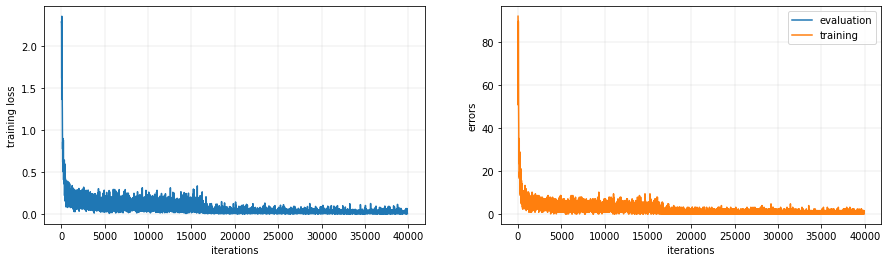

<Figure size 432x288 with 0 Axes>

In [12]:
# model = vgg16()
model = LeNet5()
nn = NN(model, DEVICE)



prune = Pruner(model, RamLoader['train'], DEVICE, silent=False)
prune.snip(0.93)

loop_operation=[prune.indicate]

nn.optim = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9, weight_decay=0.0005)
nn.scheduler = torch.optim.lr_scheduler.StepLR(nn.optim, step_size=40, gamma=0.1)

hist = nn.fit(RamLoader, torch.nn.CrossEntropyLoss(), s_report=5,
              v_report=5, max_epochs=100, silent=False, loop_operation=loop_operation)